In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Syfte

__Programmet definerar klassen EnzymeKinetics som används för att lösa modeller för enzymkinetik numeriskt med Euler fram. En modell utan inhibitor och en modell med en kompetitiv inhibitor löses.__

# Reaktioner

\begin{equation}
E + S \underset{k2}{\stackrel{k1}{\rightleftharpoons}} ES \xrightarrow{k3} E + P
\end{equation}

\begin{equation}
E + I \underset{k5}{\stackrel{k4}{\rightleftharpoons}} EI
\end{equation}

# Klassen EnzymeKinetics
__Klassen EnzymeKinetics har hastighetskonstanter och initialkoncentrationer som parametrar. Metoden Euler ger den integrerade reaktionshastigheten för samtliga specier i reaktionsmekanismerna. Om modell utan inhibitor undersöks sätts parametrarna som hör till inhibitorreaktionen till 0. Under simuleringarna med inhibitor ändras endast parametern I0.__

In [19]:
class EnzymeKinetics:
    def __init__(self, k1, k2, k3, k4, k5, S0, E0, A0, P0, I0, B0):
        self.k1 = k1
        self.k2 = k2
        self.k3 = k3
        self.k4 = k4
        self.k5 = k5
        
        self.S = [S0]
        self.E = [E0]
        self.A = [A0]
        self.P = [P0]
        self.I = [I0]
        self.B = [B0]
    
    def euler(self, dt):
        S = self.S[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1])
        E = self.E[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1] + self.k3*self.A[-1] - self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        A = self.A[-1] + dt*(self.k1*self.S[-1]*self.E[-1] - self.k2*self.A[-1] - self.k3*self.A[-1])
        P = self.P[-1] + dt*(self.k3*self.A[-1])
        I = self.I[-1] + dt*(-self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        B = self.B[-1] + dt*(self.k4*self.E[-1]*self.I[-1] - self.k5*self.B[-1])
        self.S.append(S)
        self.E.append(E)
        self.A.append(A)
        self.P.append(P)
        self.I.append(I)
        self.B.append(B)
        return self.S, self.E, self.A, self.P, self.I, self.B

        

# Definition av tidsintervall och plot-funktioner

In [20]:
N = 100 # number of intervalls.
tMax = 2000 #seconds.
t = np.linspace(0,tMax,N)
dt = tMax/N

In [21]:
def plot1(x):
    plt.rcdefaults()
    plt.rcParams.update({'font.sans-serif':'Times New Roman'})
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[ES]")
    plt.plot(t, EK.P, label="[P]")
    plt.xlabel("Tid",fontsize=12)
    plt.ylabel("Koncentration", fontsize=12)
    plt.title("Modell utan inhibitor med Enzymkoncentration " + str(round(EK.E[0],10)) + " M")
    plt.legend()
    print("Slutkoncentration av Produkt " + str(EK.P[-1]))
    plt.savefig(x, bbox_inches="tight", pad_inches=1)

In [22]:
def plot2(x):
    plt.rcdefaults()
    plt.rcParams.update({'font.sans-serif':'Times New Roman'})
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[ES]")
    plt.plot(t, EK.P, label="[P]")
    plt.plot(t, EK.B, label="[B]")
    plt.plot(t, EK.I, label="[I]")
    plt.xlabel("Tid",fontsize=12)
    plt.ylabel("Koncentration", fontsize=12)
    plt.title("Modell med inhibitor med Enzymkoncentration " + str(round(EK.E[0],10)) + " M och Inhibitorkoncentration " + str(round(EK.I[0],10)) + " M")
    plt.legend()
    print("Slutkoncentration av Produkt " + str(EK.P[-1]))
    plt.savefig(x, bbox_inches="tight", pad_inches=1)

# Modell utan kompetitiv inhibitor

\begin{equation}
\frac{dS}{dt}= -k_{1}SE + k_{2}A
\end{equation}

\begin{equation}
\frac{dE}{dt}= -k_{1}SE + k_{2}A + k_{3}A 
\end{equation}

\begin{equation}
\frac{dA}{dt}= k_{1}SE - k_{2}A - k_{3}A 
\end{equation}

\begin{equation}
\frac{dP}{dt}= k_{3}A 
\end{equation}

# Simulering 1
__Simulering av Modell utan inhibitor med enzymkoncentration 9E-7 M.__


Slutkoncentration av Produkt 1.3413099219312349e-05


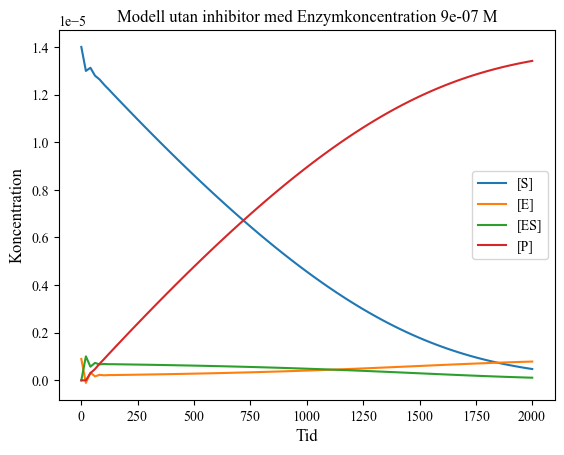

In [23]:
EK = EnzymeKinetics(4000,0.001,0.015,0,0,(14*10**-6),(9*10**-7),0,0,0,0)

for i in range(N-1):
    EK.euler(dt)
    
plot1("Utan Inhibitor 1")

# Modell med kompetitiv inhibitor


\begin{equation}
\frac{dS}{dt}= -k_{1}SE + k_{2}A
\end{equation}

\begin{equation}
\frac{dE}{dt}= -k_{1}SE + k_{2}A + k_{3}A - k_{4}EI + k_{5}B
\end{equation}

\begin{equation}
\frac{dA}{dt}= k_{1}SE - k_{2}A - k_{3}A 
\end{equation}

\begin{equation}
\frac{dP}{dt}= k_{3}A 
\end{equation}

\begin{equation}
\frac{dI}{dt}= -k_{4}EI + k_{5}B
\end{equation}

\begin{equation}
\frac{dB}{dt}= k_{4}EI - k_{5}B
\end{equation}

# Simulering 2

__Simulering med inhibitorkoncentration som motsvarar 1 inhibitormolekyl per enzymmolekyl.__

Slutkoncentration av Produkt 9.58525592283723e-06


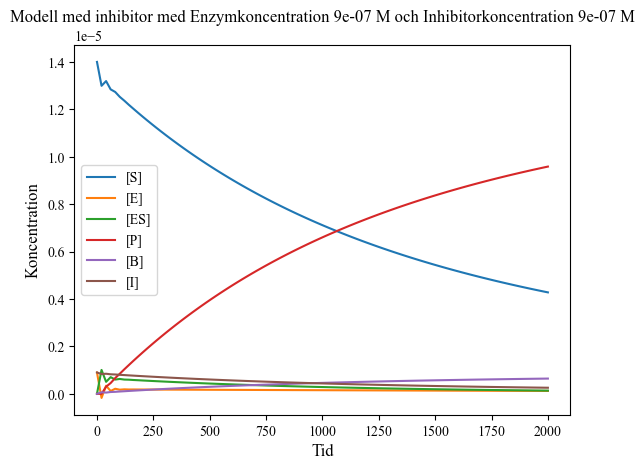

In [24]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(90*10**-8),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("Med inhibitor 2")

# Simulering 3

__Simulering med inhibitorkoncentration som motsvarar att inhibiera 50% av processen in vitro.__

Slutkoncentration av Produkt 1.0612781085060396e-05


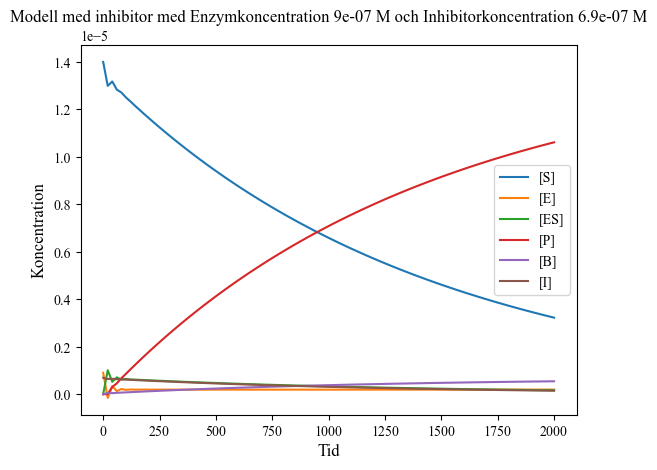

In [25]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(6.9*10**-7),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("Med inhibitor 3")

# Simulering 4

__Simulering med inhibitorkoncentration som motsvarar Minimum Inhibitory Concentration.__

Slutkoncentration av Produkt 1.3258407738127142e-05


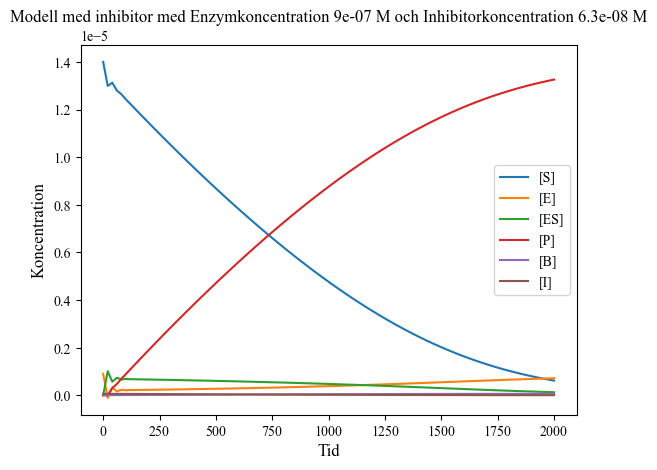

In [26]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(6.3*10**-8),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("Med inhibitor 4")